# **1. Import các thư viện**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

# **2. Đọc dữ liệu và kiểm tra tổng quan dữ liệu**

In [ ]:
df = pd.read_csv('ECommerce_Dataset_cleaned.csv')

In [ ]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
1,1,1,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
2,1,1,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
3,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
4,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10,Computer,1,30,Credit Card,Male,3,2,Laptop & Accessory,1,Married,6,0,18,1,2,4,151
5626,0,13,Mobile Phone,1,13,Credit Card,Male,3,5,Fashion,5,Married,6,0,16,1,2,3,225
5627,0,1,Mobile Phone,1,11,Debit Card,Male,3,2,Laptop & Accessory,4,Married,3,1,21,1,2,4,186
5628,0,23,Computer,3,9,Credit Card,Male,4,5,Laptop & Accessory,4,Married,4,0,15,2,2,9,179


# **3. Phân tích khám phá (EDA)**

## **3.1 Thống kê mô tả**

### **Xác định biến định lượng, biến định tính**

In [ ]:
numeric_cols = [
    "Tenure",
    "WarehouseToHome",
    "HourSpendOnApp",
    "NumberOfDeviceRegistered",
    "SatisfactionScore",
    "NumberOfAddress",
    "OrderAmountHikeFromlastYear",
    "CouponUsed",
    "OrderCount",
    "DaySinceLastOrder",
    "CashbackAmount"
]

categorical_cols = [
    "PreferredLoginDevice",
    "CityTier",
    "PreferredPaymentMode",
    "Gender",
    "PreferedOrderCat",
    "MaritalStatus",
    "Complain"
]
print("Biến định lượng:", numeric_cols)
print("Biến định tính:", categorical_cols)

Biến định lượng: ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Biến định tính: ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']


### **Các chỉ số cơ bản: mean, median, std, min, max**

In [ ]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,9.745115,1.654707,15.534636,2.934636,3.688988,3.066785,4.207282,0.284902,15.674600,1.892007,2.981350,4.441918,177.221492
std,0.374240,8.517726,0.915389,8.088873,0.705528,1.023999,1.380194,2.553082,0.451408,3.591058,2.180370,2.924132,3.493224,49.193869
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,36.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,26.000000,16.000000,16.000000,18.000000,325.000000


In [ ]:
if numeric_cols:
    desc_basic = df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max']).T
    display(desc_basic.style.format("{:,.3f}"))

,mean,median,std,min,max
Tenure,9.745,8.000,8.518,0.000,36.000
WarehouseToHome,15.535,14.000,8.089,5.000,36.000
HourSpendOnApp,2.935,3.000,0.706,0.000,5.000
NumberOfDeviceRegistered,3.689,4.000,1.024,1.000,6.000
SatisfactionScore,3.067,3.000,1.380,1.000,5.000
NumberOfAddress,4.207,3.000,2.553,1.000,11.000
OrderAmountHikeFromlastYear,15.675,15.000,3.591,11.000,26.000
CouponUsed,1.892,1.000,2.180,0.000,16.000
OrderCount,2.981,2.000,2.924,0.000,16.000
DaySinceLastOrder,4.442,3.000,3.493,0.000,18.000


### **Xác định độ lệch (Skewness) và độ nhọn (Kurtosis)**

In [ ]:
from scipy.stats import skew, kurtosis

rows = []

for col in numeric_cols:
    s = df[col].dropna()

    skew_val = skew(s)
    kurt_val = kurtosis(s)

    rows.append([col, skew_val, kurt_val])

shape_table = pd.DataFrame(rows, columns=["Feature", "Skewness", "Kurtosis"])

shape_table


,Feature,Skewness,Kurtosis
0,Tenure,0.718339,-0.449552
1,WarehouseToHome,0.944066,-0.134715
2,HourSpendOnApp,-0.040972,-0.558298
3,NumberOfDeviceRegistered,-0.396863,0.581266
4,SatisfactionScore,-0.142588,-1.125202
5,NumberOfAddress,0.962031,-0.014658
6,OrderAmountHikeFromlastYear,0.835216,-0.126329
7,CouponUsed,2.787703,10.223965
8,OrderCount,2.196789,4.762457
9,DaySinceLastOrder,0.928481,0.443319


## **3.2 Trực quan hóa:**

### **Đơn biến**

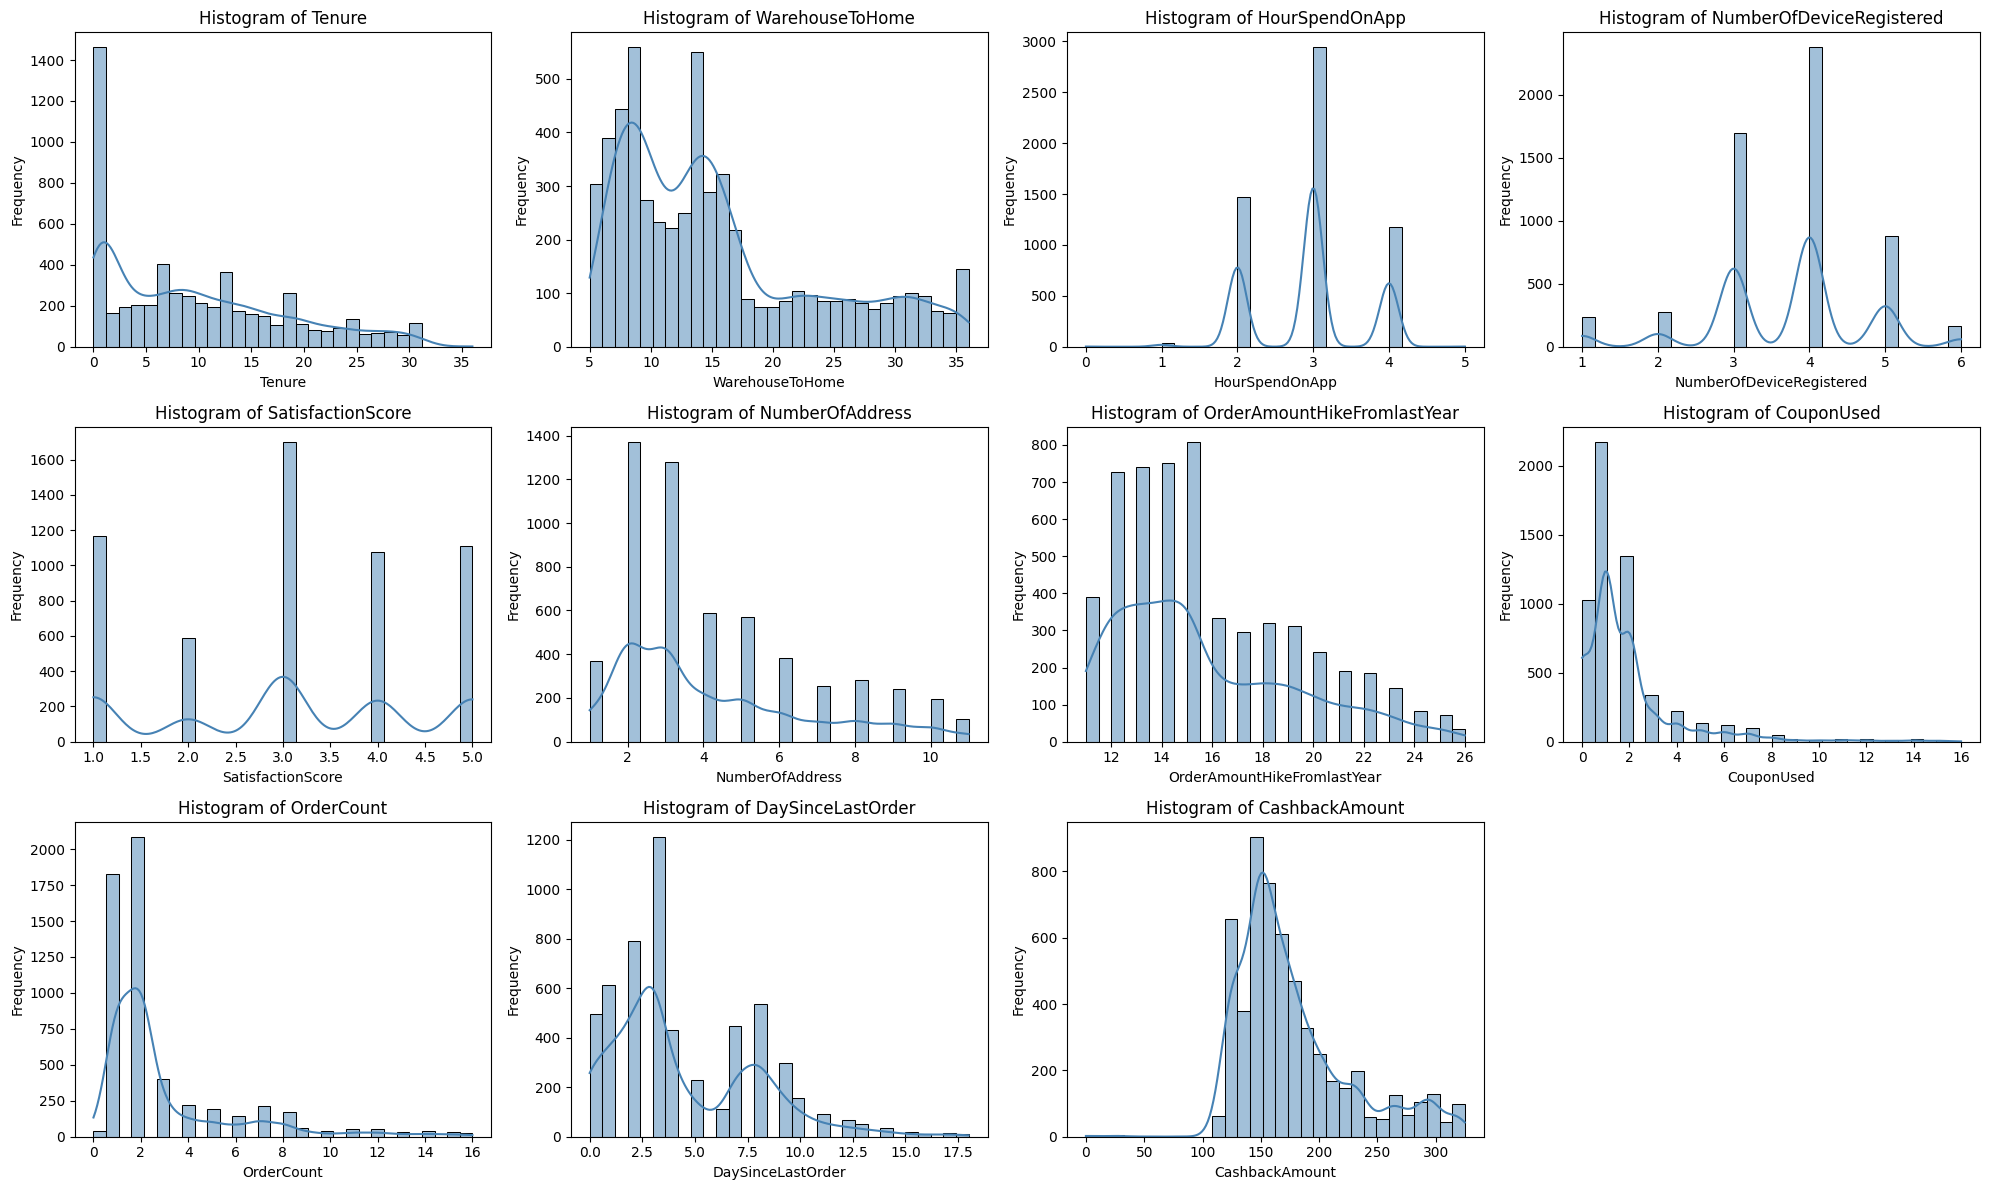

In [ ]:
n = len(numeric_cols)
n_cols = 4
n_rows = int(np.ceil(n / n_cols))

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='steelblue')
    plt.title(f"Histogram of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Nhận xét:**

- Phần lớn các biến không phân phối chuẩn, chủ yếu lệch phải, cho thấy hành vi khách hàng không đồng đều và tồn tại nhiều nhóm đặc trưng khác nhau.
- Các biến hành vi như Tenure, OrderCount, CouponUsed, DaySinceLastOrder tập trung ở giá trị thấp → đa số khách hàng có mức tương tác trung bình hoặc thấp.
- Một số biến như HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore có phân phối rời rạc theo nhóm từ đó phản ánh hành vi và mức độ hài lòng phân hóa rõ rệt.
- CashbackAmount có phân phối tương đối ổn định, ít biến động hơn so với các biến còn lại.

Nhìn chung Dữ liệu phù hợp cho phân tích trực quan, phân tích đa chiều và các mô hình phi tuyến, đồng thời cần chú ý đến outlier trong quá trình phân tích và mô hình hóa.

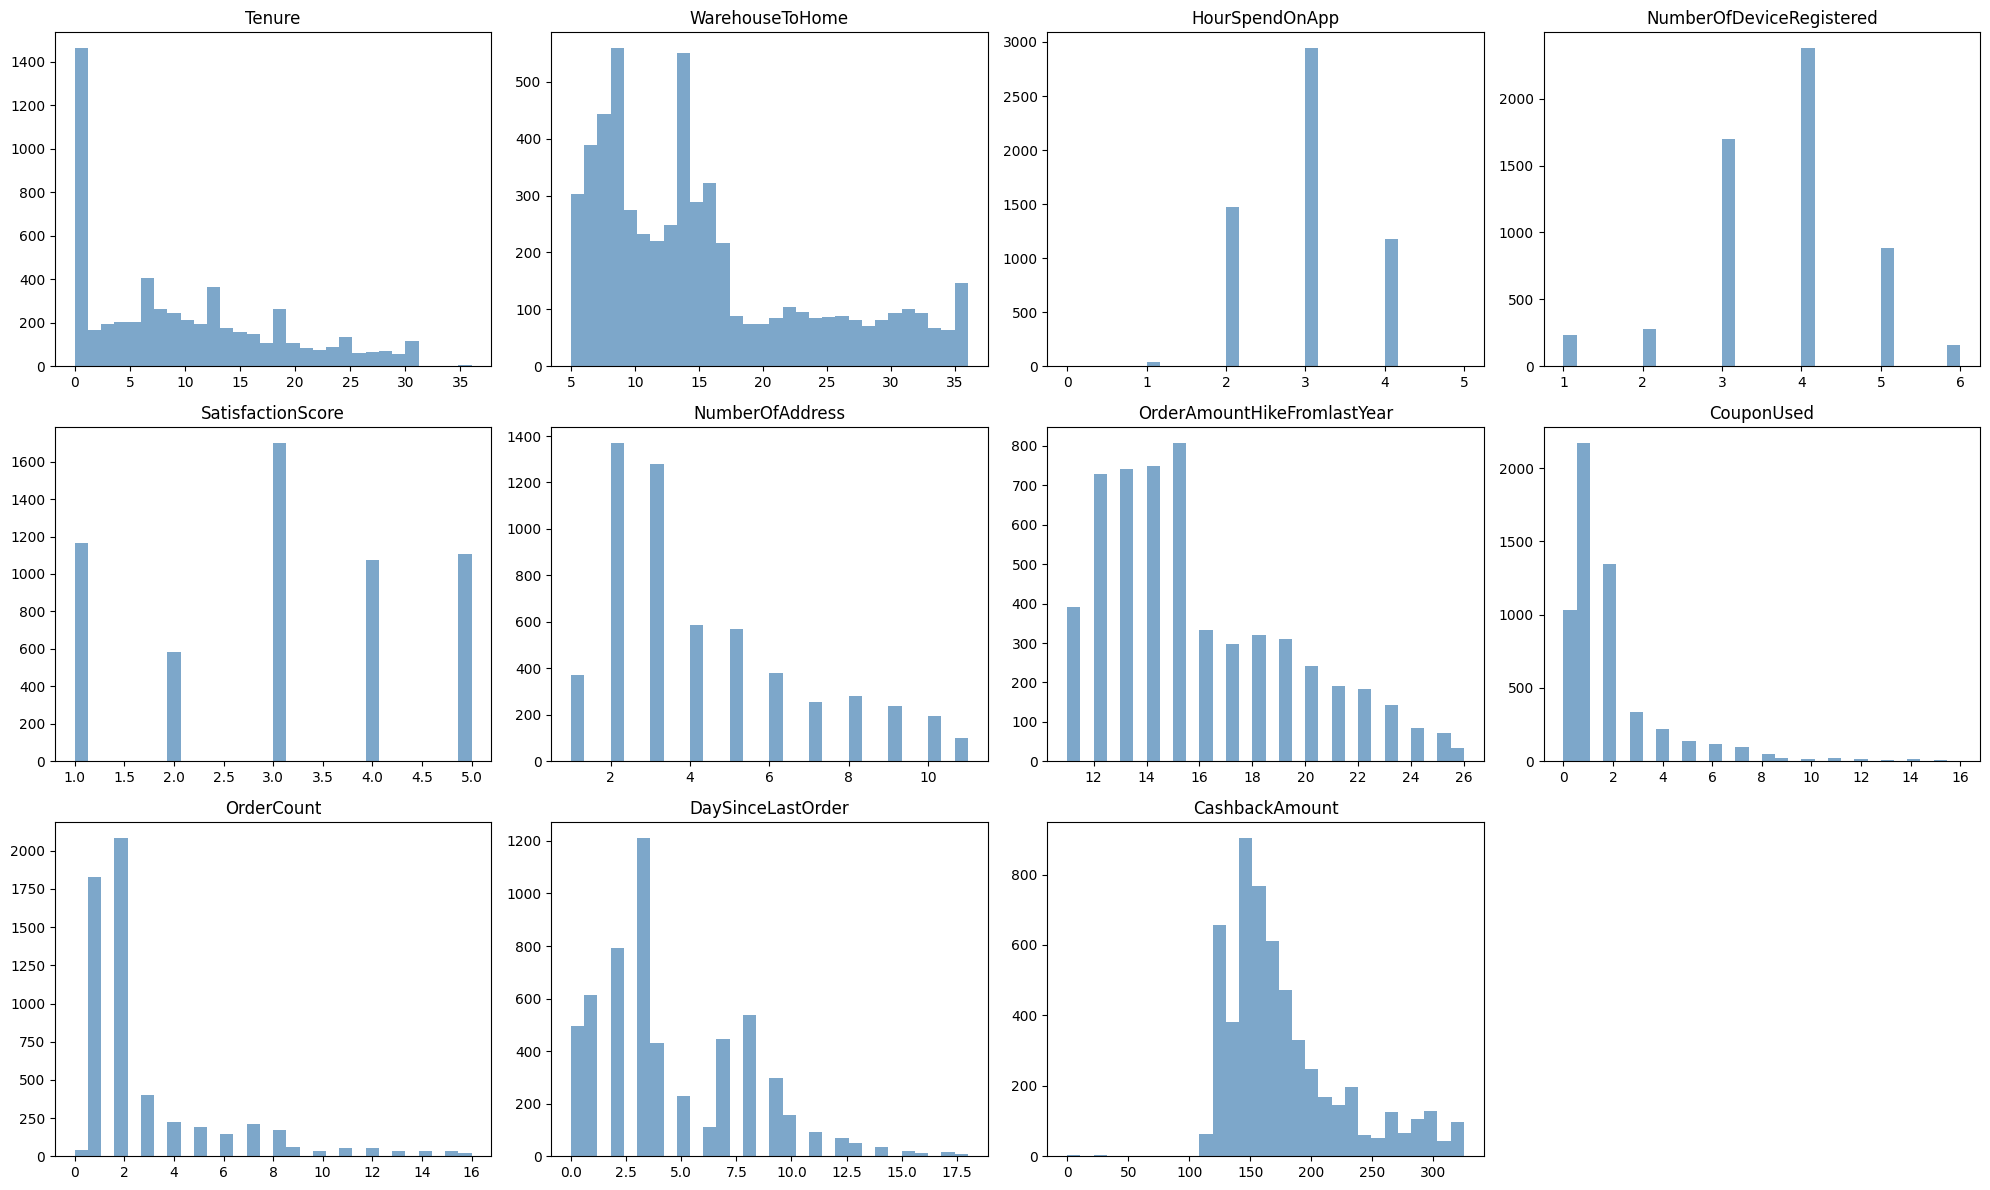

In [ ]:
cols = numeric_cols
n = len(cols)

n_cols = 4
n_rows = int(np.ceil(n / n_cols))

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(cols, 1):
    s = df[col].dropna()
    if s.empty:
        continue

    plt.subplot(n_rows, n_cols, i)
    plt.hist(s, bins=30, color='steelblue', alpha=0.7)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()


**Nhận xét:**
- Có thể thấy dữ liệu hành vi khách hàng phân bố không đều và chủ yếu lệch phải, phản ánh sự khác biệt rõ rệt giữa các nhóm người dùng. Phần lớn khách hàng có thời gian gắn bó, số đơn hàng, số lần sử dụng coupon và khoảng cách giữa các lần mua ở mức thấp, trong khi một số ít khách hàng có giá trị rất cao, tạo ra các ngoại lệ.
- Những biến như HourSpendOnApp, NumberOfDeviceRegistered và SatisfactionScore thể hiện sự phân nhóm rõ ràng theo từng mức rời rạc, cho thấy hành vi sử dụng và mức độ hài lòng không phân bố liên tục.
- CashbackAmount và OrderAmountHikeFromLastYear có xu hướng tập trung quanh một khoảng giá trị nhất định nhưng vẫn tồn tại đuôi phân phối dài.

Nhìn chung thì dữ liệu mang tính đa dạng, phi tuyến và có nhiều outlier, phù hợp cho phân tích trực quan và các mô hình học máy, đồng thời cần được tiền xử lý kỹ lưỡng trước khi xây dựng mô hình phân tích hoặc dự đoán.

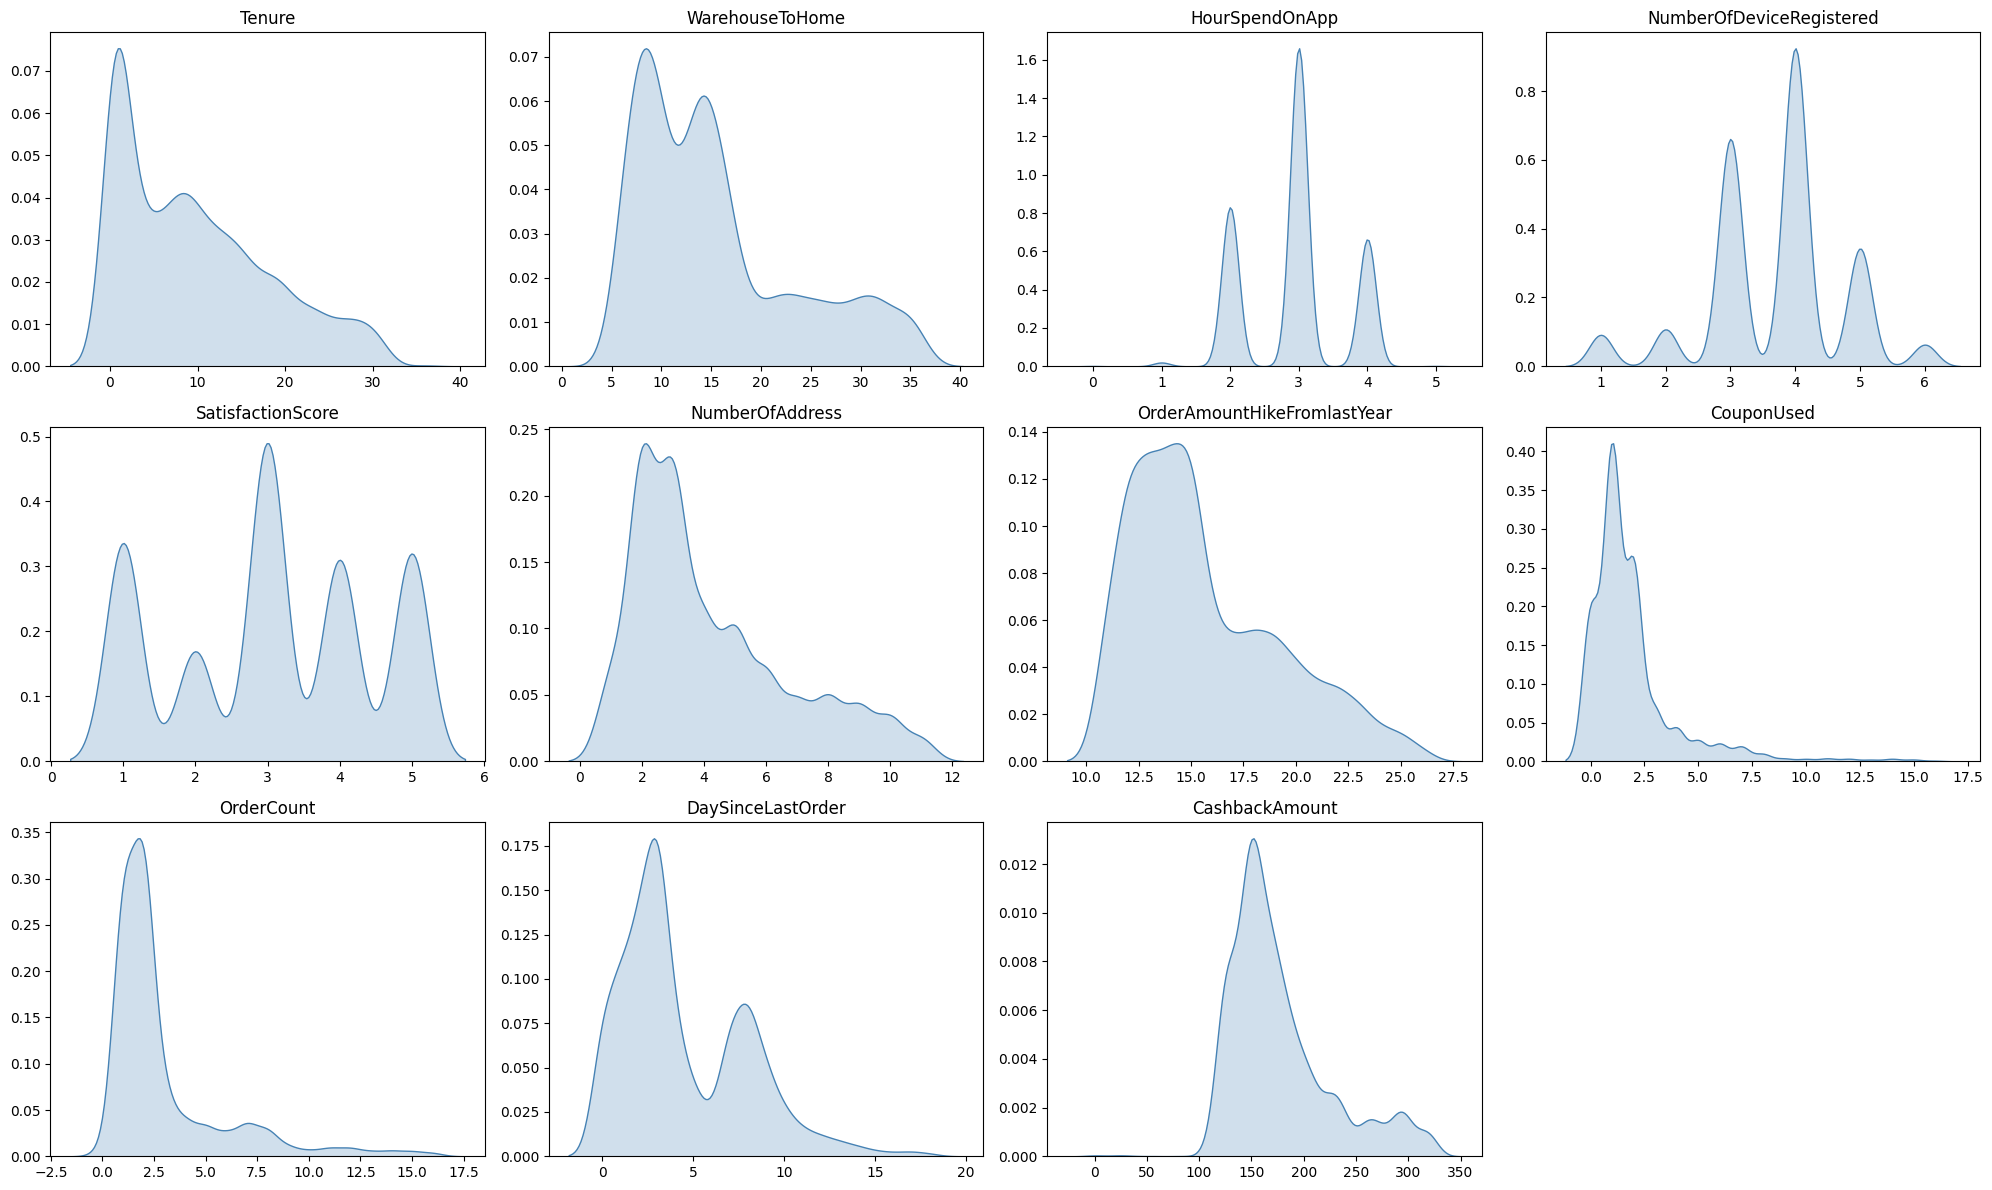

In [ ]:
n = len(numeric_cols)

n_cols = 4
n_rows = int(np.ceil(n / n_cols))

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numeric_cols, 1):
    s = df[col].dropna()
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(s, fill=True, color='steelblue', linewidth=1)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()


**Nhận xét:**
- Hầu hết các biến định lượng đều có phân phối lệch phải: tập trung nhiều ở các giá trị thấp/trung bình, và có đuôi kéo dài về phía giá trị lớn.
- Một số biến mang tính nhị phân hoặc rời rạc (Complain, CityTier…) nên đường KDE tạo thành các “cục” tách biệt đúng theo các giá trị rời rạc.
- Một vài biến có phân phối đa đỉnh như HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore… cho thấy tồn tại các nhóm hành vi khách hàng khác nhau.
- Các biến như CouponUsed, OrderCount, CashbackAmount, DaySinceLastOrder thể hiện đuôi phải rất dài, phù hợp với kết quả skewness lớn và số lượng outlier cao → Cần lưu ý khi đưa vào mô hình.

### **Đa biến**

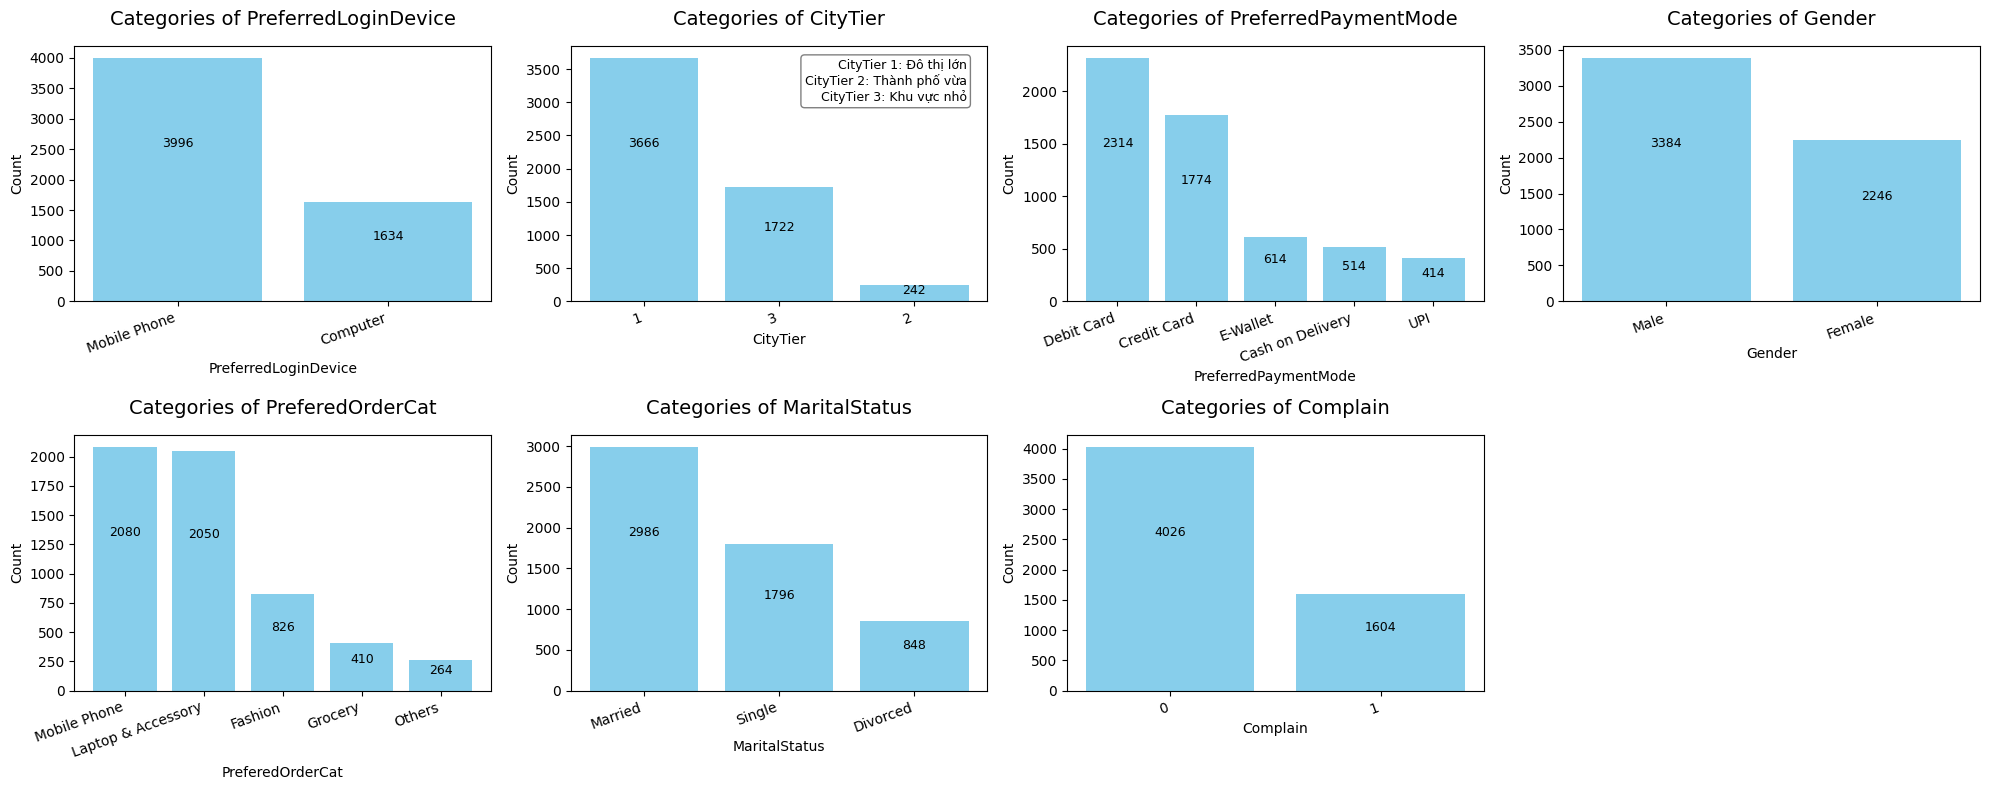

In [ ]:
n = len(categorical_cols)
n_cols = 4
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    vc = df[col].value_counts()

    bars = ax.bar(vc.index.astype(str), vc.values, color='skyblue')
    ax.set_title(f"Categories of {col}", fontsize=14, pad=15)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    ax.set_xticks(range(len(vc)))
    ax.set_xticklabels(vc.index.astype(str), rotation=20, ha="right")

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.65,
            f"{int(height)}",
            ha="center",
            va="center",
            fontsize=9,
            color="black"
        )

    if col == "CityTier":
        ax.annotate(
            "CityTier 1: Đô thị lớn\nCityTier 2: Thành phố vừa\nCityTier 3: Khu vực nhỏ",
            xy=(0.95, 0.95),
            xycoords="axes fraction",
            ha="right",
            va="top",
            fontsize=9,
            bbox=dict(boxstyle="round", fc="white", ec="gray")
        )

for ax in axes[len(categorical_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


**Nhận xét:**
- *PreferredLoginDevice:* Biểu đồ bar thể hiện đa số khách đăng nhập bằng Mobile Phone, một phần nhỏ dùng Computer. Điều này cho thấy kênh mobile là chủ đạo, cần tối ưu trải nghiệm trên app.
- *CityTier:* Khách hàng tập trung chủ yếu tại CityTier 1 (đô thị lớn), trong khi CityTier 2 chiếm tỷ lệ rất thấp. Điều này cho thấy dịch vụ hiện đang tiếp cận tốt nhóm khách hàng ở các thành phố lớn, nhưng chưa khai thác hiệu quả nhóm khách hàng ở khu vực trung gian. Sự phân bố không đồng đều theo khu vực có thể ảnh hưởng đến hành vi sử dụng và khả năng rời bỏ của khách hàng.
- *PreferredPaymentMode:* Các phương thức thanh toán Credit Card, Debit Card, E-Wallet chiếm tỷ trọng lớn. Phương thức như Cash on Delivery, UPI ít hơn → khi phân tích Churn theo payment mode, cần chú ý các nhóm nhỏ có thể dao động mạnh.
- *Gender:* Số lượng khách Male nhiều hơn. Chênh lệch không quá lớn, có thể coi giới tính tương đối cân bằng nhưng vẫn kiểm tra Churn theo giới.
- *PreferedOrderCat:* Mobile Phone, Laptop & Accessory chiếm tỷ lệ cao. Các nhóm còn lại ít hơn → có thể xem đây là những danh mục “chủ lực” và kiểm tra xem khách churn chủ yếu từ nhóm hàng nào.
- *MaritalStatus:* Married chiếm tỉ lệ lớn, Single và Divorced ít hơn. Tỉ lệ Churn theo từng nhóm này sẽ được phân tích thêm ở phần đa biến.
- *Complain:* Phần lớn khách hàng không phát sinh khiếu nại, cho thấy trải nghiệm dịch vụ nhìn chung khá ổn định. Tuy nhiên, nhóm khách hàng có khiếu nại vẫn chiếm một tỷ lệ đáng kể, đây là nhóm tiềm ẩn rủi ro churn cao và cần được phân tích kỹ hơn trong các bước tiếp theo.


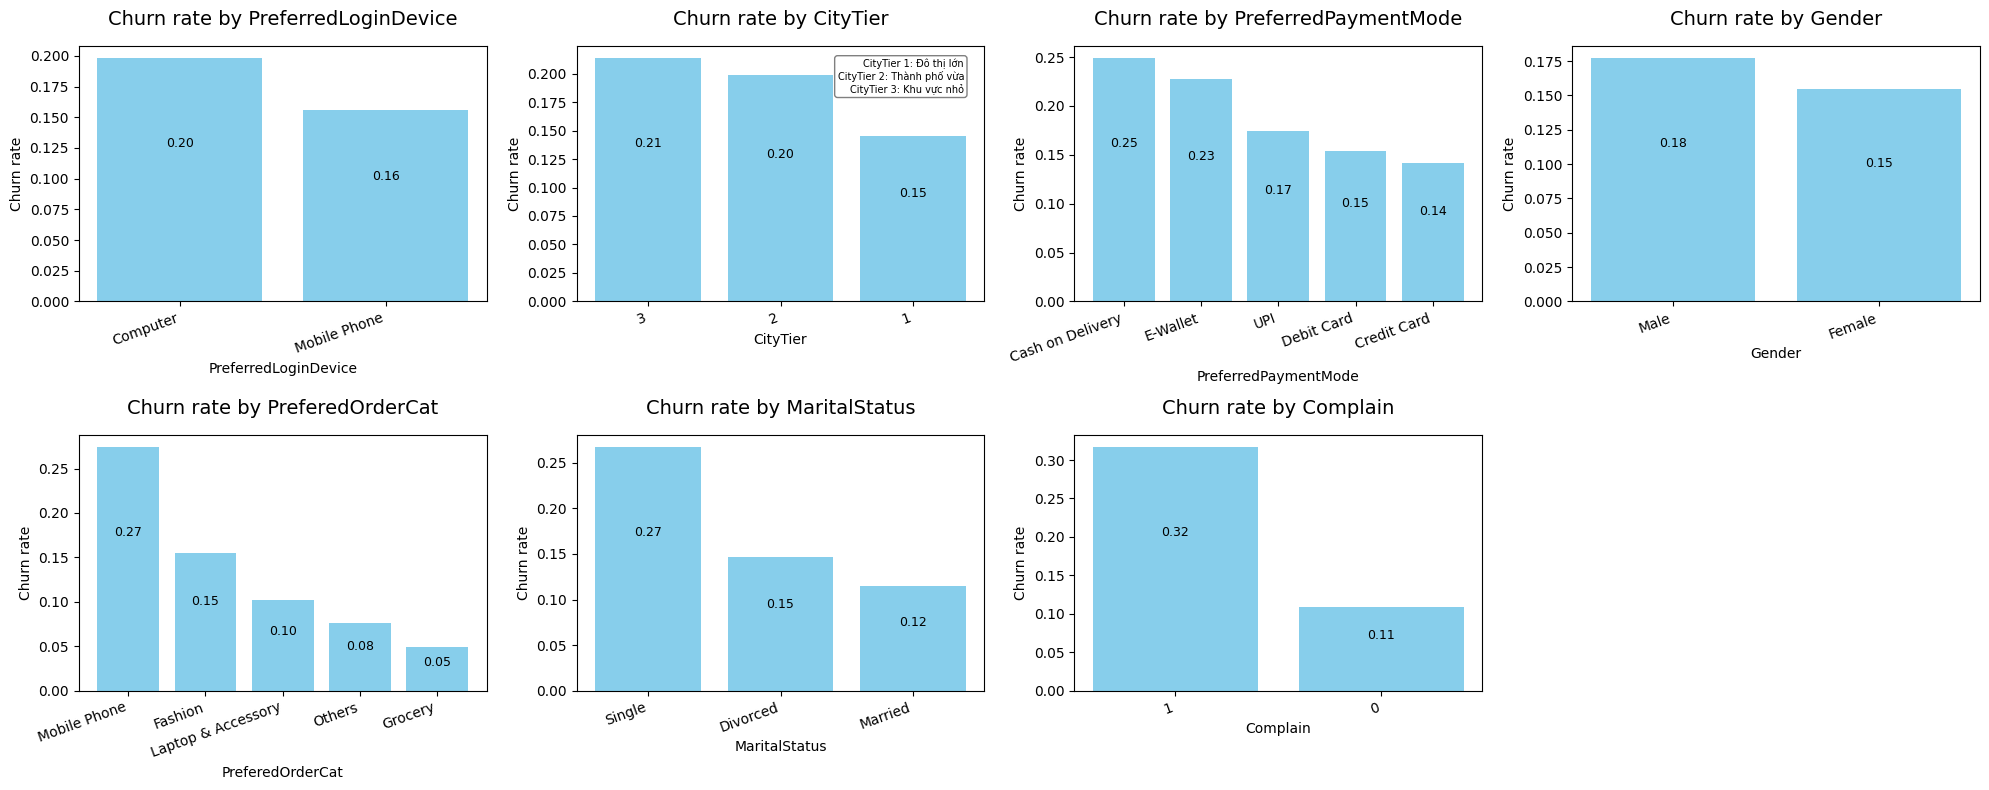

In [ ]:
target_col = "Churn"
n = len(categorical_cols)

n_cols = 4
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    rate = pd.crosstab(df[col], df[target_col], normalize="index")[1].sort_values(ascending=False)

    bars = ax.bar(rate.index.astype(str), rate.values, color="skyblue")

    ax.set_title(f"Churn rate by {col}", fontsize=14, pad=15)
    ax.set_xlabel(col)
    ax.set_ylabel("Churn rate")

    ax.set_xticks(range(len(rate)))
    ax.set_xticklabels(rate.index.astype(str), rotation=20, ha="right")

    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            h * 0.65,
            f"{h:.2f}",
            ha="center",
            va="center",
            fontsize=9,
            color="black"
        )

    if col == "CityTier":
        ax.annotate(
            "CityTier 1: Đô thị lớn\nCityTier 2: Thành phố vừa\nCityTier 3: Khu vực nhỏ",
            xy=(0.95, 0.95),
            xycoords="axes fraction",
            ha="right",
            va="top",
            fontsize=7,
            bbox=dict(boxstyle="round", fc="white", ec="gray")
        )

for ax in axes[len(categorical_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


**Nhận xét:**
*  *PreferredLoginDevice:* Nhóm đăng nhập bằng Computer có tỉ lệ churn cao hơn rõ rệt so với nhóm dùng Mobile Phone. Điều này cho thấy khách dùng Computer là phân khúc rủi ro hơn, có thể do trải nghiệm web chưa tốt bằng app di động.
* *CityTier:* Churn rate cao nhất tại CityTier 3, tiếp theo là CityTier 2, trong khi CityTier 1 có tỷ lệ thấp hơn. Điều này cho thấy khách hàng ở khu vực nhỏ và thành phố vừa có xu hướng rời bỏ dịch vụ nhiều hơn so với khách hàng ở đô thị lớn.
* *PreferredPaymentMode:* Tỉ lệ Churn theo phương thức thanh toán Cash on Delivery có tỉ lệ churn cao nhất tiếp theo là Credit Card. Điều này cho thấy khách thích COD hoặc credit card có nguy cơ rời đi cao hơn, có thể do trải nghiệm thanh toán chưa ổn định hoặc thói quen tiêu dùng không bền vững.
* *PreferedOrderCat:* Tỉ lệ Churn theo danh mục sản phẩm ưa thích
Khách hàng thường mua Fashion có tỉ lệ churn cao nhất. Ngược lại, nhóm mua Others hoặc Mobile Phone có tỉ lệ churn thấp hơn  Điều này gợi ý nhóm khách mua Fashion là phân khúc rủi ro, có thể do cạnh tranh cao hoặc ít gắn bó thương hiệu.
* *MaritalStatus:* Divorced có churn cao nhất, tiếp theo là Married (~15%).
Nhóm Single có churn thấp nhất. Điều này cho thấy các nhóm đã lập gia đình hoặc ly hôn có xu hướng churn cao hơn nhóm độc thân.
* *Complain:* Khách hàng có khiếu nại có churn rate rất cao, cao gấp gần 3 lần so với nhóm không khiếu nại. Đây là biến có mức độ phân tách churn mạnh nhất và nhiều khả năng là yếu tố dự báo quan trọng trong mô hình.

=> Các biến phân loại cho thấy sự khác biệt rõ rệt về tỉ lệ churn giữa các nhóm. Nhóm Computer login, Cash on Delivery, Fashion, Divorced, và Female là những phân khúc có rủi ro churn cao nhất. Đây là các nhóm nên được ưu tiên trong chiến dịch giữ chân khách hàng.




* Biến mục tiêu:
  * 'Churn' (1 = đã rời bỏ, 0 = còn hoạt động).
  * giá trị trung bình ~0.168 → khoảng **16.8% khách hàng rời bỏ**, cho thấy dữ liệu bị **mất cân bằng nhẹ** giữa hai lớp (Churn vs Non-Churn).

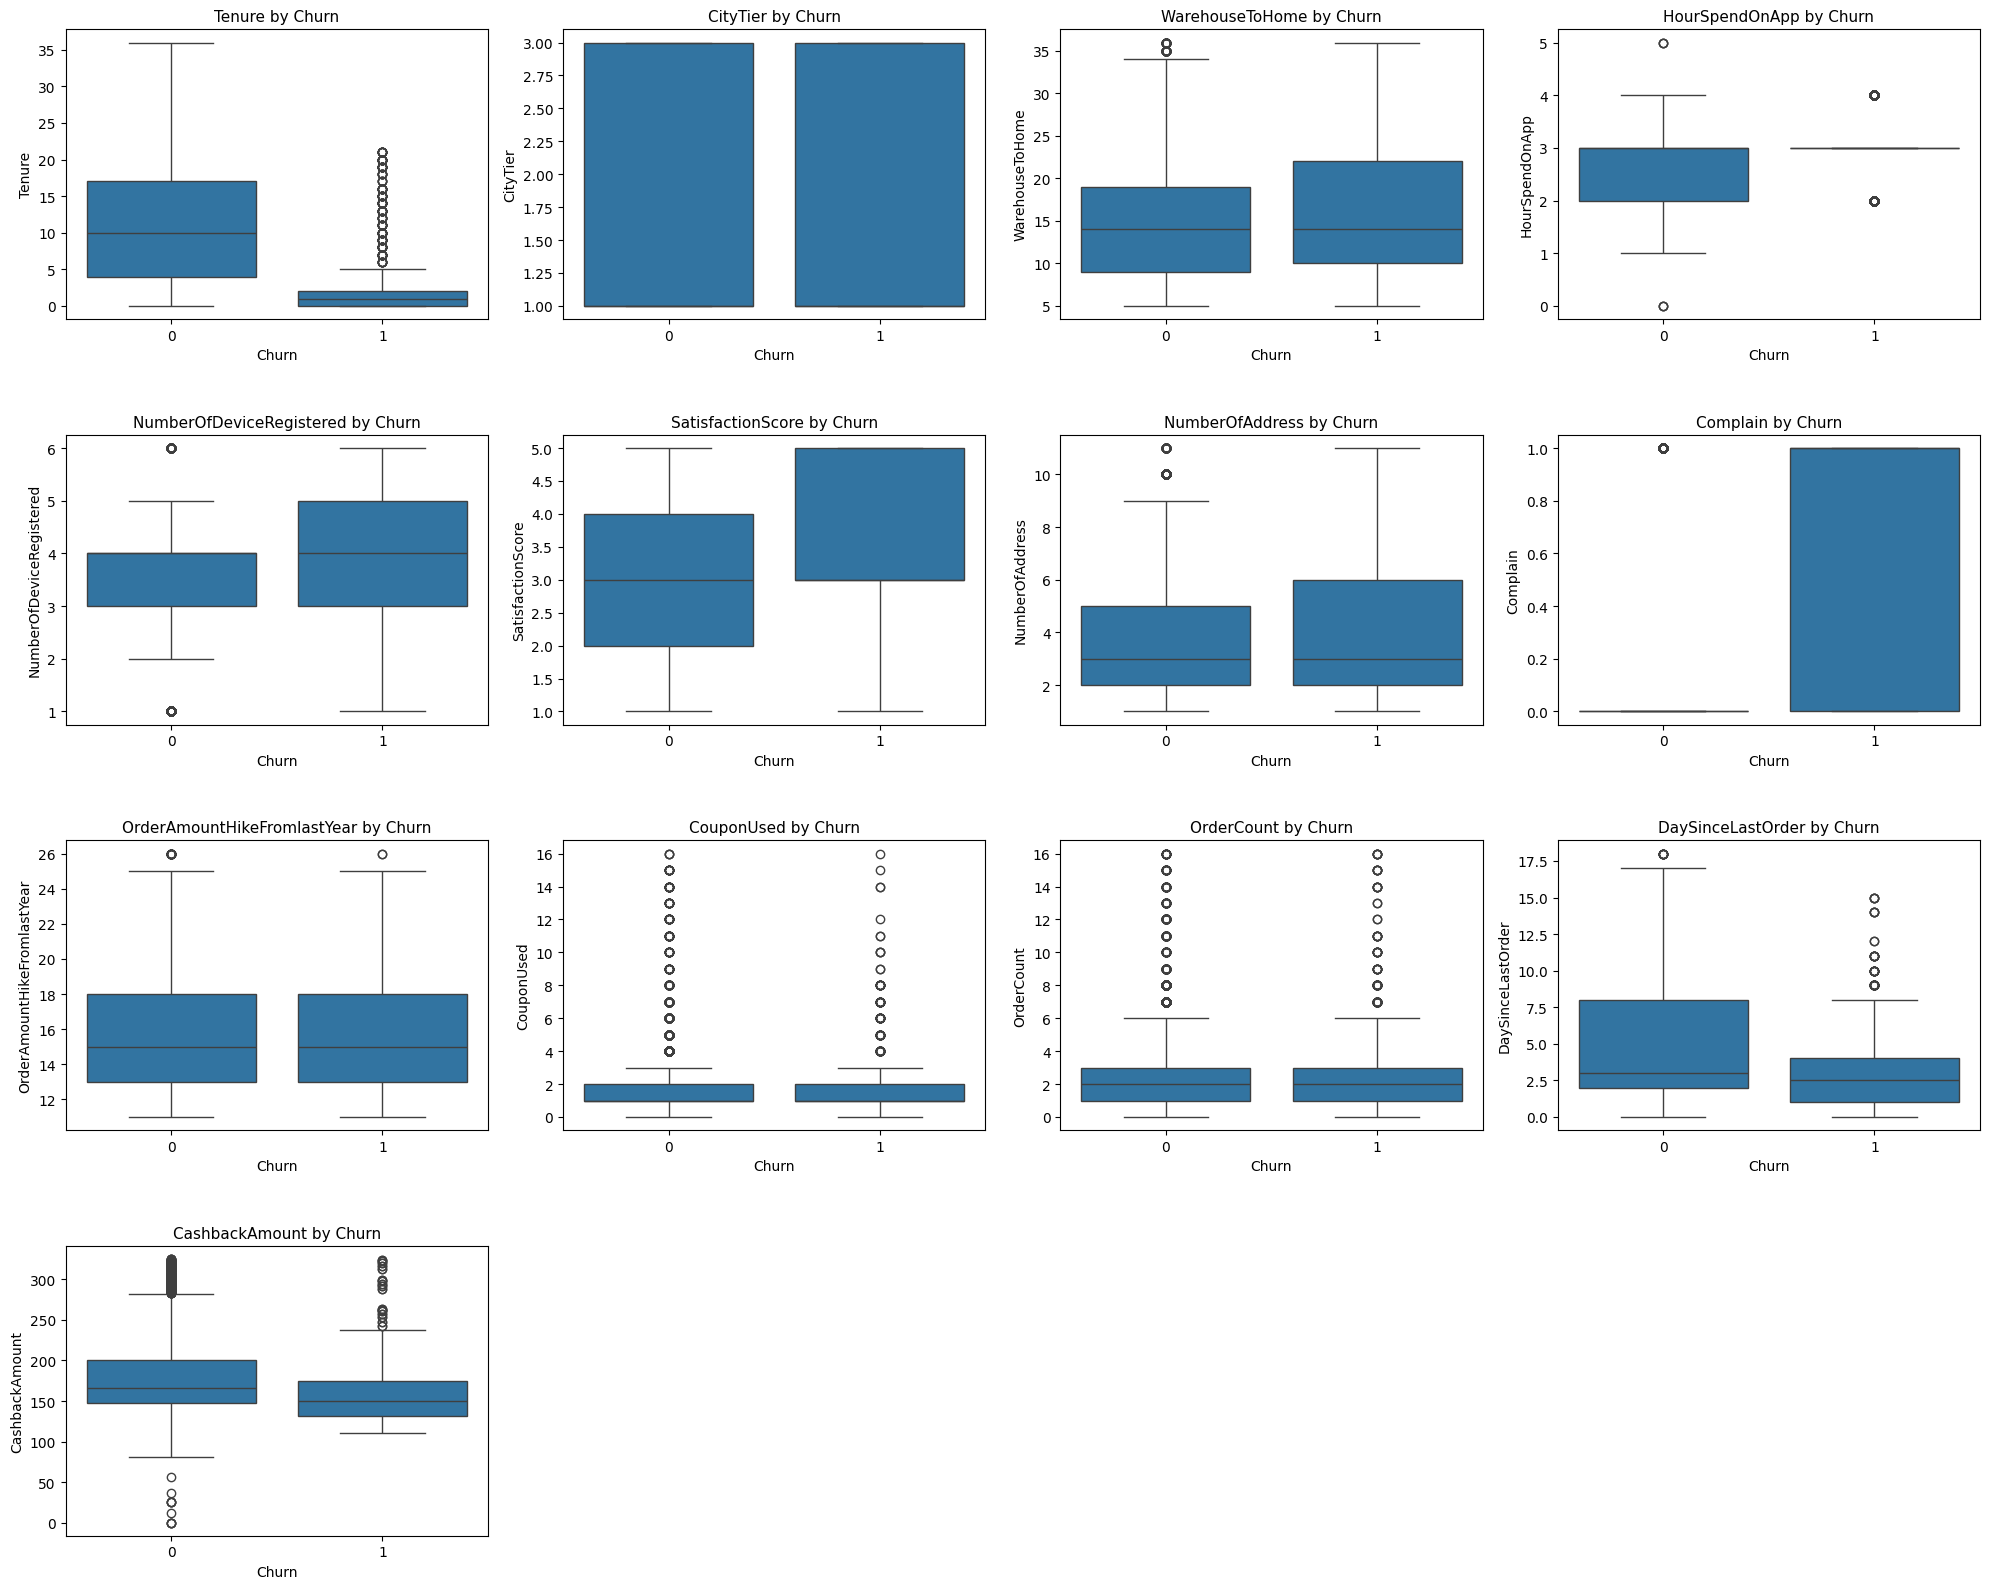

In [ ]:
target_col = "Churn"
numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != target_col]
n = len(numeric_cols)
n_cols = 4
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sub = df[[col, target_col]]
    sns.boxplot(
        data=sub,
        x=target_col,
        y=col,
        ax=ax
    )
    ax.set_title(f"{col} by {target_col}", fontsize=11)
    ax.set_xlabel(target_col)
    ax.set_ylabel(col)

for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()


In [ ]:
target_col = "Churn"

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != target_col]

total_outliers = 0
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_out = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(df_out)
    total_outliers += len(df_out)
print("Tổng số outlier toàn dataset:", total_outliers)
print("-Số outlier theo từng biến-")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")

Tổng số outlier toàn dataset: 2410
-Số outlier theo từng biến-
Tenure: 0
CityTier: 0
WarehouseToHome: 0
HourSpendOnApp: 6
NumberOfDeviceRegistered: 397
SatisfactionScore: 0
NumberOfAddress: 0
Complain: 0
OrderAmountHikeFromlastYear: 33
CouponUsed: 746
OrderCount: 722
DaySinceLastOrder: 59
CashbackAmount: 447


In [ ]:
target_col = "Churn"

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != target_col]

#Nếu muốn xem chi tiết
for col in numeric_cols:
    print(f"\nOutlier của biến {col}: {outlier_summary[col]} dòng")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_out = df[(df[col] < lower) | (df[col] > upper)]

    print(df_out)


Outlier của biến Tenure: 0 dòng
Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

Outlier của biến CityTier: 0 dòng
Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

Outlier của biến WarehouseToHome: 0 dòng
Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus

- Trong các biến định lượng, đa số biến như **Tenure, CityTier, WarehouseToHome, SatisfactionScore, NumberOfAddress, Complain** gần như không xuất hiện ngoại lệ theo quy tắc IQR, cho thấy phân phối khá ổn định.

- Ngược lại, các biến **CouponUsed, OrderCount, CashbackAmount, NumberOfDeviceRegistered** có số lượng ngoại lệ rất lớn, phản ánh sự tồn tại của một nhóm khách hàng có hành vi sử dụng dịch vụ vượt trội so với phần còn lại (dùng nhiều coupon, đặt nhiều đơn hàng, nhận cashback cao, đăng ký nhiều thiết bị).
- Các biến này cần được tập trung phân tích sâu thêm vì nhiều khả năng có liên quan mạnh tới hành vi Churn của khách hàng.

In [ ]:
target_col = "Churn"

rows = []

for col in numeric_cols:
    data = df[[col, target_col]]
    r, p = stats.pearsonr(data[col], data[target_col])
    rows.append([col, r, p])

result = pd.DataFrame(rows, columns=["Feature", "r_value", "p_value"])

result

,Feature,r_value,p_value
0,Tenure,-0.347056,4.342988e-159
1,CityTier,0.084703,1.945388e-10
2,WarehouseToHome,0.073543,3.306091e-08
3,HourSpendOnApp,0.018816,1.580613e-01
4,NumberOfDeviceRegistered,0.107939,4.626452e-16
5,SatisfactionScore,0.105481,2.105157e-15
6,NumberOfAddress,0.042485,1.430111e-03
7,Complain,0.250188,4.282982e-81
8,OrderAmountHikeFromlastYear,-0.007075,5.955964e-01
9,CouponUsed,-0.027350,4.016122e-02


In [ ]:
scatter_cols = [
    "Tenure",
    "OrderCount",
    "HourSpendOnApp",
    "DaySinceLastOrder",
    "CashbackAmount"
]
target_col = "Churn"


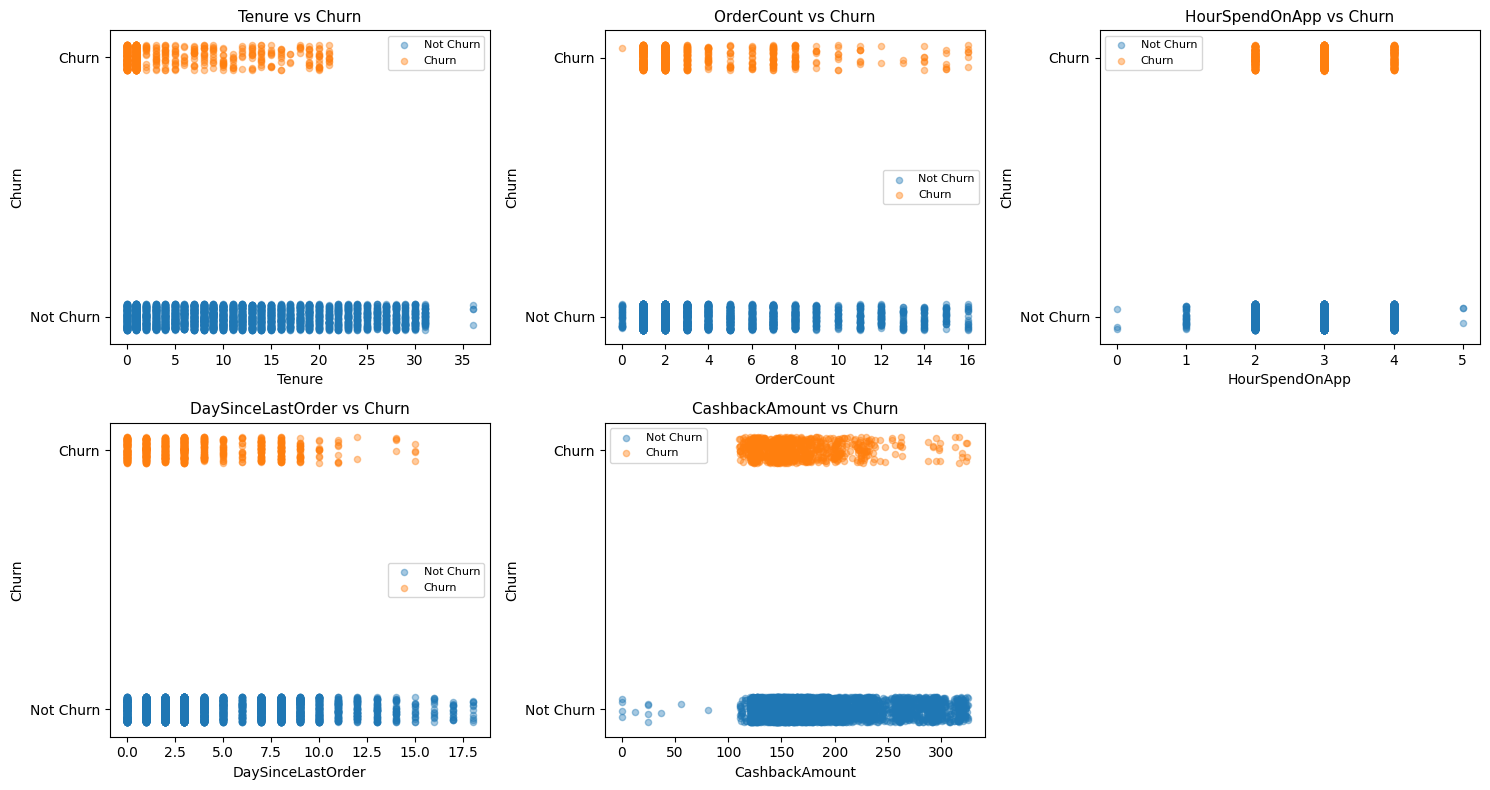

In [ ]:
n = len(scatter_cols)
n_cols = 3
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for ax, col in zip(axes, scatter_cols):
    data = df[[col, target_col]].dropna()

    y_jitter = data[target_col] + np.random.uniform(-0.05, 0.05, size=len(data))

    ax.scatter(
        data.loc[data[target_col] == 0, col],
        y_jitter[data[target_col] == 0],
        alpha=0.4,
        s=20,
        label="Not Churn"
    )

    ax.scatter(
        data.loc[data[target_col] == 1, col],
        y_jitter[data[target_col] == 1],
        alpha=0.4,
        s=20,
        label="Churn"
    )

    ax.set_title(f"{col} vs Churn", fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel("Churn")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Not Churn", "Churn"])
    ax.legend(fontsize=8)

for ax in axes[len(scatter_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


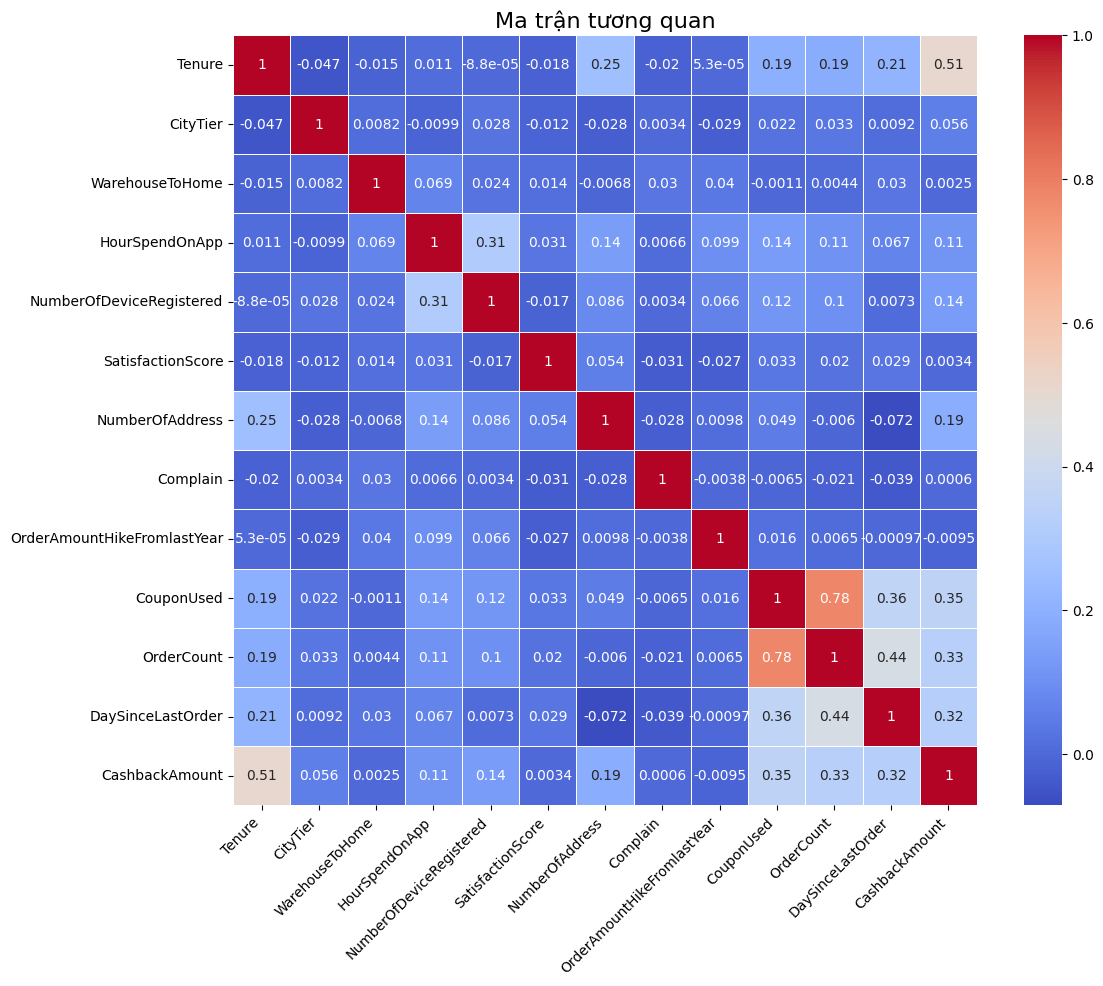

In [ ]:
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

**Nhận xét:**
- Không có cặp nào tương quan **mạnh** (nghĩa là |r| ≥ 0.8)
- Một số cặp có tương quan **khá**:
  + CouponUsed – OrderCount (r ≈ 0.78)
  + Tenure – CashbackAmount (r ≈ 0.51)
  + OrderCount – DaySinceLastOrder (r ≈ 0.44)
  + CouponUsed – DaySinceLastOrder (r ≈ 0.36)
- Có thể thấy nhóm biến CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount, Tenure có mối quan hệ khá chặt, có thể đại diện cho một “hành vi sử dụng” chung.
**Cần cẩn thận multicollinearity nếu sau này dùng mô hình hồi quy.**

## **3.3 Phát hiện & báo cáo:**

Qua các biểu đồ có thể ghi nhận một số xu hướng chính:
- Các trường **Tenure, SatisfactionScore, CashbackAmount** tập trung ở mức cao hơn trong **nhóm không Churn** cho thấy khách hàng gắn bó lâu, hài lòng cao và được hưởng ưu đãi nhiều thì ít rời bỏ hơn, trong khi **DaySinceLastOrder và Complain** thường cao hơn/ xuất hiện nhiều hơn ở **nhóm Churn** gợi ý khách hàng lâu không đặt hàng hoặc từng khiếu nại dễ rời bỏ.Từ đó thấy được mối liên hệ khá rõ giữa hành vi – trải nghiệm khách hàng và khả năng rời bỏ, .
- Ngược lại, các trường như CityTier, WarehouseToHome, NumberOfAddress, HourSpendOnApp, OrderCount, OrderAmountHikeFromlastYear không tạo ra mẫu phân tách rõ rệt giữa hai nhóm, gợi ý mối tương quan yếu hơn với Churn.

Từ các quan sát này, có thể đề xuất giả thuyết ban đầu cho giai đoạn mô hình hóa:

H1: Khách hàng có DaySinceLastOrder cao có xác suất Churn cao hơn.

H2: Khách hàng có SatisfactionScore thấp dễ Churn hơn.

H3: Khách hàng từng Complain = 1 có khả năng Churn cao.

H4: CashbackAmount cao giúp giảm nguy cơ Churn.

H5: Tenure dài là yếu tố bảo vệ, làm giảm khả năng Churn.